## Embedding creation

Here we generate the embeddings (idk probably we can add more noise or do it differently)

In [72]:
import numpy as np
import pandas as pd

def generate_meetings_gmm_employees(
    n_meetings,
    n_employees=5,
    embedding_dim=128,
    samples_per_meeting=5,
    random_state=0,
):
    rng = np.random.default_rng(random_state)

    # Employee = GMM component (ben separati)
    means = rng.normal(0, 10, size=(n_employees, embedding_dim))
    scales = rng.uniform(2,3, size=(n_employees, embedding_dim))

    # Mixture weights
    mixture_weights = rng.random(n_employees)
    mixture_weights /= mixture_weights.sum()

    rows = []

    for m in range(n_meetings):
        embeddings = []
        employee_ids = []

        for _ in range(samples_per_meeting):
            # sample employee
            z = rng.choice(n_employees, p=mixture_weights)
            x = rng.normal(means[z], scales[z])

            embeddings.append(x)
            employee_ids.append(z)

        rows.append({
            "meeting_id": m,
            "embeddings": np.stack(embeddings),   # (samples_per_meeting, embedding_dim)
            "employee_id": employee_ids,          # ground truth
        })

    df = pd.DataFrame(rows)
    return df, means, scales, mixture_weights

df, means, scales, mixture_weights = generate_meetings_gmm_employees(
    n_employees=5,
    embedding_dim=128,
    n_meetings=10
)

df.head()

,meeting_id,embeddings,employee_id
0,0,"[[-8.379317378558156, -6.73410503926509, -6.68...","[3, 0, 0, 0, 0]"
1,1,"[[-10.09371127833295, 5.32877435007231, -4.626...","[2, 4, 0, 0, 2]"
2,2,"[[-4.89777361964353, -10.46120071309339, -9.91...","[1, 0, 0, 4, 0]"
3,3,"[[-3.9952697012654608, 2.5629025170107598, -8....","[2, 1, 0, 0, 2]"
4,4,"[[-7.866729047216063, 3.021745374795121, -9.10...","[2, 1, 3, 4, 0]"


## Visualization

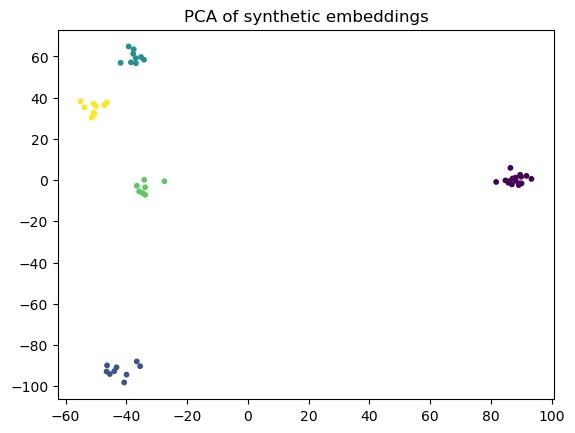

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# raccogli tutti gli embedding
X = np.vstack(df["embeddings"].values)
y = np.hstack(df["employee_id"].values)

pca = PCA(n_components=3)
X2 = pca.fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1], c=y, s=10)
plt.title("PCA of synthetic embeddings")
plt.show()



In [74]:
from scipy.spatial.distance import pdist, squareform

# distanze tra centri
center_dist = pdist(means).mean()

# raggio medio (std norm)
cluster_radius = np.mean(np.linalg.norm(scales, axis=1))

print(center_dist / cluster_radius)

5.576951508451627


## Generate tasks for each meeting for each employee

I did for a bank even if it's dangerous but it can be easily changed (I did it just to see if it works)

In [75]:
import pandas as pd
from itertools import product

def generate_tasks_from_components(part1, part2, part3, template, n_tasks=100):
    tasks = []
    for a, b, c in product(part1, part2, part3):
        tasks.append(template.format(a=a, b=b, c=c))
        if len(tasks) >= n_tasks:
            break
    return tasks

roles = {
    1: "analyst",
    2: "manager",
    3: "engineer",
    4: "risk_officer",
    5: "compliance_officer",
}

all_rows = []

# --- Analyst (employee_1) ---
part1 = ["Analyze", "Review", "Prepare", "Summarize", "Forecast"]
part2 = ["profitability", "credit risk", "liquidity", "capital adequacy", "customer churn"]
part3 = ["for retail banking clients", "for corporate lending portfolio",
         "for small business loans", "for mortgage products", "for wealth management clients"]
template = "{a} {b} {c}."
analyst_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in analyst_tasks:
    all_rows.append({
        "employee_id": 1,
        "role": roles[1],
        "task_description": task,
    })

# --- Manager (employee_2) ---
part1 = ["Plan", "Supervise", "Approve", "Monitor", "Coordinate"]
part2 = ["branch performance", "team targets", "budget allocation", "sales campaigns", "operational efficiency"]
part3 = ["for the retail division", "for the corporate division",
         "for the digital channels", "for the wealth management unit", "for the back-office team"]
template = "{a} {b} {c}."
manager_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in manager_tasks:
    all_rows.append({
        "employee_id": 2,
        "role": roles[2],
        "task_description": task,
    })

# --- Engineer (employee_3) ---
part1 = ["Design", "Implement", "Optimize", "Monitor", "Debug"]
part2 = ["payment processing services", "transaction monitoring pipelines",
         "core banking APIs", "data ingestion jobs", "fraud detection models"]
part3 = ["for high availability", "for low latency", "for better scalability",
         "for improved security", "for regulatory reporting needs"]
template = "{a} {b} {c}."
engineer_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in engineer_tasks:
    all_rows.append({
        "employee_id": 3,
        "role": roles[3],
        "task_description": task,
    })

# --- Risk Officer (employee_4) ---
part1 = ["Assess", "Update", "Approve", "Document", "Review"]
part2 = ["credit risk limits", "market risk exposure", "operational risk incidents",
         "stress test scenarios", "counterparty risk reports"]
part3 = ["for corporate clients", "for trading activities",
         "for retail products", "for treasury operations", "for new product proposals"]
template = "{a} {b} {c}."
risk_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in risk_tasks:
    all_rows.append({
        "employee_id": 4,
        "role": roles[4],
        "task_description": task,
    })

# --- Compliance Officer (employee_5) ---
part1 = ["Conduct", "Document", "Investigate", "Report", "Verify"]
part2 = ["KYC reviews", "AML alerts", "regulatory breaches",
         "internal policy exceptions", "suspicious transactions"]
part3 = ["for high-risk clients", "for new account openings",
         "for international wire transfers", "for politically exposed persons",
         "for large cash deposits"]
template = "{a} {b} {c}."
compliance_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in compliance_tasks:
    all_rows.append({
        "employee_id": 5,
        "role": roles[5],
        "task_description": task,
    })


df_tasks = pd.DataFrame(all_rows)

print(df_tasks.head())
print("Totale righe:", len(df_tasks))  

csv_path = "bank_employee_tasks.csv"
df_tasks.to_csv(csv_path, index=False)
csv_path

   employee_id     role                                   task_description
0            1  analyst  Analyze profitability for retail banking clients.
1            1  analyst  Analyze profitability for corporate lending po...
2            1  analyst    Analyze profitability for small business loans.
3            1  analyst       Analyze profitability for mortgage products.
4            1  analyst  Analyze profitability for wealth management cl...
Totale righe: 500


'bank_employee_tasks.csv'

## Creation Dataset useful for prediction

This dataset involves only the embeddings and the employee_id. However, I think probably is better to use the dataset as suggested by Christina (https://www.kaggle.com/datasets/eustaceameliat/extended-skill-task-assignment) and group by some rows to generate meeting as done at the end of the notebook.

In [76]:
import numpy as np
import pandas as pd

df_tasks = pd.read_csv("bank_employee_tasks.csv")

# dizionario: employee_id (1..5) -> lista di task possibili
tasks_by_emp = {
    emp_id: group["task_description"].tolist()
    for emp_id, group in df_tasks.groupby("employee_id")
}

rows = []

for _, row in df.iterrows():
    meeting_id = row["meeting_id"]
    embs = row["embeddings"]      # shape (5, 128)
    emp_components = row["employee_id"]  # lista di 5 elementi, valori 0..4

    row_dict = {"meeting_id": meeting_id}

    # per ogni posizione del meeting
    for pos, (comp, emb) in enumerate(zip(emp_components, embs), start=1):
        emp_id = int(comp) + 1            # da 0..4 -> 1..5
        candidate_tasks = tasks_by_emp[emp_id]
        task_desc = np.random.choice(candidate_tasks)

        # colonne posizionali: 1..5
        row_dict[f"employee_id_{pos}"] = emp_id
        row_dict[f"task_{pos}"] = task_desc
        row_dict[f"embedding_{pos}"] = emb

    rows.append(row_dict)

df_meetings_wide = pd.DataFrame(rows)


print("Numero righe (meeting):", len(df_meetings_wide))
print("Esempio embedding_1 shape:", df_meetings_wide["embedding_1"].iloc[0].shape)
df_meetings_wide.head()

Numero righe (meeting): 10
Esempio embedding_1 shape: (128,)


,meeting_id,employee_id_1,task_1,embedding_1,employee_id_2,task_2,embedding_2,employee_id_3,task_3,embedding_3,employee_id_4,task_4,embedding_4,employee_id_5,task_5,embedding_5
0,0,4,Update operational risk incidents for treasury...,"[-8.379317378558156, -6.73410503926509, -6.680...",1,Summarize credit risk for corporate lending po...,"[2.7902933341840264, 0.08233734698961732, 8.62...",1,Prepare customer churn for wealth management c...,"[-2.2011601340089393, -1.4162289168168805, 10....",1,Analyze capital adequacy for wealth management...,"[-3.0879403795507807, -0.8430228771071876, 8.9...",1,Prepare customer churn for wealth management c...,"[-0.6968563190491617, -1.4471730769988993, 0.8..."
1,1,3,Optimize transaction monitoring pipelines for ...,"[-10.09371127833295, 5.32877435007231, -4.6260...",5,Conduct suspicious transactions for internatio...,"[-2.1821814680421134, -3.850946770190398, 13.1...",1,Analyze credit risk for mortgage products.,"[-2.168205692200063, -4.06207917229777, 11.402...",1,Prepare credit risk for small business loans.,"[2.456421586590857, 0.2071445746402206, 3.8816...",3,Monitor payment processing services for better...,"[-7.7629495364996846, 1.3503073163598656, -5.8..."
2,2,2,Monitor budget allocation for the back-office ...,"[-4.89777361964353, -10.46120071309339, -9.915...",1,Review profitability for corporate lending por...,"[1.6273422107036055, -3.7788269435412927, 6.04...",1,Prepare customer churn for corporate lending p...,"[4.729038898689591, 0.3391993544504383, 3.7645...",5,Investigate KYC reviews for international wire...,"[-2.6908063270304305, -2.5386231506890273, 14....",1,Summarize credit risk for corporate lending po...,"[0.5822042488299595, -0.6970824854142884, 7.64..."
3,3,3,Design payment processing services for better ...,"[-3.9952697012654608, 2.5629025170107598, -8.3...",2,Approve team targets for the retail division.,"[-0.9769872520334598, -8.528697007518549, -12....",1,Review capital adequacy for wealth management ...,"[2.8413510296312205, -0.8347740551352252, 3.70...",1,Summarize credit risk for retail banking clients.,"[2.0551278152738357, -0.6399411178757517, 11.1...",3,Monitor payment processing services for low la...,"[-5.996066582210657, 2.0529359575221884, -12.8..."
4,4,3,Monitor core banking APIs for improved security.,"[-7.866729047216063, 3.021745374795121, -9.100...",2,Supervise budget allocation for the digital ch...,"[-6.281559964372163, -10.866656964159832, -6.2...",4,Approve operational risk incidents for treasur...,"[-4.686644290038671, -2.763725345771408, -10.0...",5,Report AML alerts for large cash deposits.,"[0.04091899572809194, -3.434442494008241, 15.7...",1,Summarize liquidity for mortgage products.,"[2.9506861034320364, 2.615169702753625, 5.0530..."


In [77]:
# mappa id -> ruolo
roles = {
    1: "analyst",
    2: "manager",
    3: "engineer",
    4: "risk_officer",
    5: "compliance_officer",
}

# crea colonne role_i a partire da employee_id_i
for i in range(1, 6):   # oppure range(1, 5) se hai solo 4 partecipanti
    df_meetings_wide[f"role_{i}"] = df_meetings_wide[f"employee_id_{i}"].map(roles)

df_meetings_wide.head()

,meeting_id,employee_id_1,task_1,embedding_1,employee_id_2,task_2,embedding_2,employee_id_3,task_3,embedding_3,...,task_4,embedding_4,employee_id_5,task_5,embedding_5,role_1,role_2,role_3,role_4,role_5
0,0,4,Update operational risk incidents for treasury...,"[-8.379317378558156, -6.73410503926509, -6.680...",1,Summarize credit risk for corporate lending po...,"[2.7902933341840264, 0.08233734698961732, 8.62...",1,Prepare customer churn for wealth management c...,"[-2.2011601340089393, -1.4162289168168805, 10....",...,Analyze capital adequacy for wealth management...,"[-3.0879403795507807, -0.8430228771071876, 8.9...",1,Prepare customer churn for wealth management c...,"[-0.6968563190491617, -1.4471730769988993, 0.8...",risk_officer,analyst,analyst,analyst,analyst
1,1,3,Optimize transaction monitoring pipelines for ...,"[-10.09371127833295, 5.32877435007231, -4.6260...",5,Conduct suspicious transactions for internatio...,"[-2.1821814680421134, -3.850946770190398, 13.1...",1,Analyze credit risk for mortgage products.,"[-2.168205692200063, -4.06207917229777, 11.402...",...,Prepare credit risk for small business loans.,"[2.456421586590857, 0.2071445746402206, 3.8816...",3,Monitor payment processing services for better...,"[-7.7629495364996846, 1.3503073163598656, -5.8...",engineer,compliance_officer,analyst,analyst,engineer
2,2,2,Monitor budget allocation for the back-office ...,"[-4.89777361964353, -10.46120071309339, -9.915...",1,Review profitability for corporate lending por...,"[1.6273422107036055, -3.7788269435412927, 6.04...",1,Prepare customer churn for corporate lending p...,"[4.729038898689591, 0.3391993544504383, 3.7645...",...,Investigate KYC reviews for international wire...,"[-2.6908063270304305, -2.5386231506890273, 14....",1,Summarize credit risk for corporate lending po...,"[0.5822042488299595, -0.6970824854142884, 7.64...",manager,analyst,analyst,compliance_officer,analyst
3,3,3,Design payment processing services for better ...,"[-3.9952697012654608, 2.5629025170107598, -8.3...",2,Approve team targets for the retail division.,"[-0.9769872520334598, -8.528697007518549, -12....",1,Review capital adequacy for wealth management ...,"[2.8413510296312205, -0.8347740551352252, 3.70...",...,Summarize credit risk for retail banking clients.,"[2.0551278152738357, -0.6399411178757517, 11.1...",3,Monitor payment processing services for low la...,"[-5.996066582210657, 2.0529359575221884, -12.8...",engineer,manager,analyst,analyst,engineer
4,4,3,Monitor core banking APIs for improved security.,"[-7.866729047216063, 3.021745374795121, -9.100...",2,Supervise budget allocation for the digital ch...,"[-6.281559964372163, -10.866656964159832, -6.2...",4,Approve operational risk incidents for treasur...,"[-4.686644290038671, -2.763725345771408, -10.0...",...,Report AML alerts for large cash deposits.,"[0.04091899572809194, -3.434442494008241, 15.7...",1,Summarize liquidity for mortgage products.,"[2.9506861034320364, 2.615169702753625, 5.0530...",engineer,manager,risk_officer,compliance_officer,analyst


In [78]:
# Dataset with tasks and embeddings
output_path = "meetings_with_tasks.csv"
df_meetings_wide.to_csv(output_path, index=False)
output_path
df_meetings_wide_csv = pd.read_csv("meetings_with_tasks.csv")
df_meetings_wide_csv.head()

,meeting_id,employee_id_1,task_1,embedding_1,employee_id_2,task_2,embedding_2,employee_id_3,task_3,embedding_3,...,task_4,embedding_4,employee_id_5,task_5,embedding_5,role_1,role_2,role_3,role_4,role_5
0,0,4,Update operational risk incidents for treasury...,[-8.37931738e+00 -6.73410504e+00 -6.68076090e+...,1,Summarize credit risk for corporate lending po...,[ 2.79029333 0.08233735 8.62990665 -1.15...,1,Prepare customer churn for wealth management c...,[-2.20116013e+00 -1.41622892e+00 1.05156938e+...,...,Analyze capital adequacy for wealth management...,[ -3.08794038 -0.84302288 8.91727458 0.58...,1,Prepare customer churn for wealth management c...,[ -0.69685632 -1.44717308 0.81818106 4.01...,risk_officer,analyst,analyst,analyst,analyst
1,1,3,Optimize transaction monitoring pipelines for ...,[-10.09371128 5.32877435 -4.62603647 22.07...,5,Conduct suspicious transactions for internatio...,[ -2.18218147 -3.85094677 13.18360251 -8.28...,1,Analyze credit risk for mortgage products.,[ -2.16820569 -4.06207917 11.40221638 0.88...,...,Prepare credit risk for small business loans.,[ 2.45642159 0.20714457 3.88166728 1.67...,3,Monitor payment processing services for better...,[ -7.76294954 1.35030732 -5.8436889 25.89...,engineer,compliance_officer,analyst,analyst,engineer
2,2,2,Monitor budget allocation for the back-office ...,[-4.89777362e+00 -1.04612007e+01 -9.91588137e+...,1,Review profitability for corporate lending por...,[ 1.62734221 -3.77882694 6.0481496 1.77...,1,Prepare customer churn for corporate lending p...,[ 4.7290389 0.33919935 3.76452848 1.76...,...,Investigate KYC reviews for international wire...,[ -2.69080633 -2.53862315 14.32832303 -6.78...,1,Summarize credit risk for corporate lending po...,[ 0.58220425 -0.69708249 7.64867866 2.27...,manager,analyst,analyst,compliance_officer,analyst
3,3,3,Design payment processing services for better ...,[ -3.9952697 2.56290252 -8.39400634 24.66...,2,Approve team targets for the retail division.,[ -0.97698725 -8.52869701 -12.94583117 -0.74...,1,Review capital adequacy for wealth management ...,[ 2.84135103e+00 -8.34774055e-01 3.70059416e+...,...,Summarize credit risk for retail banking clients.,[ 2.05512782 -0.63994112 11.19457001 -0.41...,3,Monitor payment processing services for low la...,[-5.99606658e+00 2.05293596e+00 -1.28521776e+...,engineer,manager,analyst,analyst,engineer
4,4,3,Monitor core banking APIs for improved security.,[ -7.86672905 3.02174537 -9.10076286 25.34...,2,Supervise budget allocation for the digital ch...,[ -6.28155996 -10.86665696 -6.25214779 -0.25...,4,Approve operational risk incidents for treasur...,[-4.68664429e+00 -2.76372535e+00 -1.00282373e+...,...,Report AML alerts for large cash deposits.,[ 0.040919 -3.43444249 15.76678269 -10.98...,1,Summarize liquidity for mortgage products.,[ 2.9506861 2.6151697 5.0530132 3.38...,engineer,manager,risk_officer,compliance_officer,analyst


## Generate meeting text from 

In [79]:
import os
import openai
import pandas as pd
from tqdm.auto import tqdm

os.environ["OPENAI_API_KEY"] = 'sk-MUW96idC6Mker23Qmy09Bg'#put your apy key here or just ask me (francesco) and I will give you mine (i don't pay btw)

client = openai.OpenAI(
    api_key=os.environ["OPENAI_API_KEY"],  
    base_url="https://litellm.sph-prod.ethz.ch/v1",
)

In [ ]:
import pandas as pd

def build_prompt_from_row(row, max_participants=5):
    """Build a prompt using only the participants present in the row.

    Speakers are named generically as Employee 1, Employee 2, ...
    but each Employee i corresponds to a specific underlying role
    (analyst, manager, engineer, etc.) as defined in the dataset.
    """
    lines = []
    speakers = []

    # Prefer explicit count if available, otherwise infer from non-null employee_id_* columns
    n_participants = row.get("n_participants")
    try:
        n_participants = int(n_participants) if pd.notna(n_participants) else None
    except Exception:
        n_participants = None

    if n_participants is None:
        n_participants = 0
        for i in range(1, max_participants + 1):
            if pd.notna(row.get(f"employee_id_{i}")):
                n_participants += 1

    for i in range(1, n_participants + 1):
        emp_id = row.get(f"employee_id_{i}")
        role = row.get(f"role_{i}")  # not shown in speaker label, but kept for semantics
        task = row.get(f"task_{i}")
        if pd.isna(emp_id) or pd.isna(task):
            continue

        speaker = f"Employee {i}"
        speakers.append(speaker)

        # Se vuoi, puoi usare anche il ruolo nella descrizione del task (ma non nel nome speaker):
        # role_str = str(role).replace("_", " ").title() if pd.notna(role) else None
        # desc_prefix = f"({role_str}) " if role_str else ""
        # lines.append(f"{speaker}: {desc_prefix}{task}")

        lines.append(f"{speaker}: {task}")

    tasks_block = "\n".join(lines)
    unique_speakers = ", ".join(dict.fromkeys(speakers))

    prompt = f"""
You are generating a realistic short meeting transcript in a bank.

Participants in this meeting (use these as speaker names): {unique_speakers}

Here are the tasks that each participant is working on in this meeting:
{tasks_block}

Write a meeting transcript in English (20 sentences), where the participants discuss these tasks.
Do not list the tasks; write it as natural dialogue.
Use ONLY Employee 1, Employee 2, etc. (as listed above) as speakers. Do not invent new participants.
"""
    return prompt.strip()

In [86]:
df = pd.read_csv("meetings_with_tasks.csv")

transcripts = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    prompt = build_prompt_from_row(row)

    response = client.chat.completions.create(
        model="anthropic/claude-sonnet-4-5",  # come nel tuo esempio SPH
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        temperature=0.7,
        max_tokens=400,
    )

    text = response.choices[0].message.content.strip()
    transcripts.append(text)

# Aggiungi la colonna al DataFrame
df["meeting_transcript"] = transcripts

# Salva nuovo CSV
output_path = "meetings_with_tasks_with_transcript_diff_empl.csv"
df.to_csv(output_path, index=False)
output_path

  0%|          | 0/10 [00:00<?, ?it/s]

'meetings_with_tasks_with_transcript_diff_empl.csv'

In [89]:
# Create a LONG dataset: one row per (meeting, employee-slot)
# Columns: meeting_id, employee_id_i, task_i, role_i, meeting_transcript

MAX_PARTICIPANTS = 5

long_parts = []
for i in range(1, MAX_PARTICIPANTS + 1):
    cols = [
        "meeting_id",
        "meeting_transcript",
        f"employee_id_{i}",
        f"task_{i}",
        f"role_{i}",
    ]

    # keep only columns that exist (in case role_i is not present)
    cols_existing = [c for c in cols if c in df.columns]
    tmp = df[cols_existing].copy()

    rename_map = {
        f"employee_id_{i}": "employee_id_i",
        f"task_{i}": "task_i",
        f"role_{i}": "role_i",
    }
    tmp = tmp.rename(columns=rename_map)

    # if role_i column doesn't exist, create it
    if "role_i" not in tmp.columns:
        tmp["role_i"] = pd.NA

    # keep only valid participant slots
    tmp = tmp[tmp["employee_id_i"].notna() & tmp["task_i"].notna()]

    long_parts.append(tmp)


df_long = (
    pd.concat(long_parts, ignore_index=True)
    [["meeting_id", "employee_id_i", "task_i", "role_i", "meeting_transcript"]]
    .sort_values(["meeting_id", "employee_id_i"], kind="stable")
)

df_long.head()

output_long = "meetings_employee_tasks_long.csv"

df_long.to_csv(output_long, index=False)
output_long

'meetings_employee_tasks_long.csv'

In [93]:
df_long.head(10)

,meeting_id,employee_id_i,task_i,role_i,meeting_transcript
10,0,1,Summarize credit risk for corporate lending po...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
20,0,1,Prepare customer churn for wealth management c...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
30,0,1,Analyze capital adequacy for wealth management...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
40,0,1,Prepare customer churn for wealth management c...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
0,0,4,Update operational risk incidents for treasury...,risk_officer,**Meeting Transcript**\n\nEmployee 1: Good mor...
21,1,1,Analyze credit risk for mortgage products.,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
31,1,1,Prepare credit risk for small business loans.,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
1,1,3,Optimize transaction monitoring pipelines for ...,engineer,**Meeting Transcript**\n\nEmployee 1: Good mor...
41,1,3,Monitor payment processing services for better...,engineer,**Meeting Transcript**\n\nEmployee 1: Good mor...
11,1,5,Conduct suspicious transactions for internatio...,compliance_officer,**Meeting Transcript**\n\nEmployee 1: Good mor...


In [104]:
import pandas as pd

df_long = pd.read_csv("meetings_employee_tasks_long.csv")
df_long.head()

,meeting_id,employee_id_i,task_i,role_i,meeting_transcript
0,0,1,Summarize credit risk for corporate lending po...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
1,0,1,Prepare customer churn for wealth management c...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
2,0,1,Analyze capital adequacy for wealth management...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
3,0,1,Prepare customer churn for wealth management c...,analyst,**Meeting Transcript**\n\nEmployee 1: Good mor...
4,0,4,Update operational risk incidents for treasury...,risk_officer,**Meeting Transcript**\n\nEmployee 1: Good mor...


In [107]:
i = 2 # ad esempio la prima riga

# Solo la stringa del transcript
transcript = df_long.loc[i, "meeting_transcript"]
print(transcript)

**Meeting Transcript**

Employee 1: Good morning everyone. Let's get started. I wanted to give you all a quick update on the operational risk incidents in treasury operations.

Employee 2: Thanks. Before you continue, I should mention I'm still working on the credit risk summary for our corporate lending portfolio. It should be ready by end of week.

Employee 1: That works. So we've identified three major incidents this quarter, mostly related to settlement delays and documentation errors.

Employee 3: Interesting. I'm seeing some patterns in my analysis too. The customer churn data for wealth management clients shows we're losing about 8% annually.

Employee 4: That's concerning. From my capital adequacy analysis, those wealth management clients represent a significant portion of our stable funding base.

Employee 3: Exactly my worry. The clients we're losing tend to be in the higher net worth brackets.

Employee 2: Is there any correlation with credit events? I'm seeing some stress i